In [310]:
import pandas as pd
import folium
import geopandas as gpd
import plotly.express as px
import matplotlib.pyplot as plt
from folium.plugins import HeatMap
from geopy.distance import geodesic

In [278]:
def load_sampled_data(file_path, sample_fraction=0.1):
    # Read a random sample of the data (10% in this case)
    data = pd.read_csv(file_path).sample(frac=sample_fraction, random_state=42)
    return data


In [279]:
df= load_sampled_data("../Datasets/archive/2009.csv",sample_fraction=0.1)


In [280]:
df.fillna({"CANCELLATION_CODE": "None", "CARRIER_DELAY": 0, "WEATHER_DELAY": 0, "NAS_DELAY": 0, 
            "SECURITY_DELAY": 0, "LATE_AIRCRAFT_DELAY": 0}, inplace=True)


In [281]:
df.head()

FL_DATE OP_CARRIER  OP_CARRIER_FL_NUM ORIGIN DEST  CRS_DEP_TIME  \
3702461  2009-07-26         XE               2235    ATL  IAH          1200   
2178254  2009-05-04         AS                118    ANC  SEA           630   
3167802  2009-06-28         MQ               4201    ORD  MKE          1405   
2724814  2009-06-04         WN                937    SAT  HRL           835   
2864515  2009-06-11         MQ               3588    MOB  DFW          1720   

         DEP_TIME  DEP_DELAY  TAXI_OUT  WHEELS_OFF  ...  CRS_ELAPSED_TIME  \
3702461    1155.0       -5.0      19.0      1214.0  ...             122.0   
2178254     628.0       -2.0      12.0       640.0  ...             200.0   
3167802    1411.0        6.0      10.0      1421.0  ...              45.0   
2724814     831.0       -4.0       9.0       840.0  ...              50.0   
2864515    1714.0       -6.0      10.0      1724.0  ...             100.0   

         ACTUAL_ELAPSED_TIME  AIR_TIME  DISTANCE  CARRIER_DELAY  \
3702461                116.0      92.0     689.0            0.0   
2178254                210.0     189.0    1449.0            0.0   
3167802                 34.0      19.0      67.0            0.0   
2724814                 48.0      38.0     233.0            0.0   
2864515                116.0      88.0     540.0            0.0   

         WEATHER_DELAY NAS_DELAY  SECURITY_DELAY  LATE_AIRCRAFT_DELAY  \
3702461            0.0       0.0             0.0                  0.0   
2178254            0.0       0.0             0.0                  0.0   
3167802            0.0       0.0             0.0                  0.0   
2724814            0.0       0.0             0.0                  0.0   
2864515            0.0       0.0             0.0                  0.0   

         Unnamed: 27  
3702461          NaN  
2178254          NaN  
3167802          NaN  
2724814          NaN  
2864515          NaN  

[5 rows x 28 columns]

In [282]:
columns_with_null = df.columns[df.isnull().any()].tolist()


In [283]:
columns_with_null

['DEP_TIME',
 'DEP_DELAY',
 'TAXI_OUT',
 'WHEELS_OFF',
 'WHEELS_ON',
 'TAXI_IN',
 'ARR_TIME',
 'ARR_DELAY',
 'ACTUAL_ELAPSED_TIME',
 'AIR_TIME',
 'Unnamed: 27']

In [284]:
null_counts = df.isnull().sum()

In [285]:
null_counts

FL_DATE                     0
OP_CARRIER                  0
OP_CARRIER_FL_NUM           0
ORIGIN                      0
DEST                        0
CRS_DEP_TIME                0
DEP_TIME                 8319
DEP_DELAY                8319
TAXI_OUT                 8601
WHEELS_OFF               8601
WHEELS_ON                8959
TAXI_IN                  8959
CRS_ARR_TIME                0
ARR_TIME                 8959
ARR_DELAY               10317
CANCELLED                   0
CANCELLATION_CODE           0
DIVERTED                    0
CRS_ELAPSED_TIME            0
ACTUAL_ELAPSED_TIME     10317
AIR_TIME                10317
DISTANCE                    0
CARRIER_DELAY               0
WEATHER_DELAY               0
NAS_DELAY                   0
SECURITY_DELAY              0
LATE_AIRCRAFT_DELAY         0
Unnamed: 27            642934
dtype: int64

In [286]:
null_percentage = (null_counts / len(df)) * 100
null_percentage

FL_DATE                  0.000000
OP_CARRIER               0.000000
OP_CARRIER_FL_NUM        0.000000
ORIGIN                   0.000000
DEST                     0.000000
CRS_DEP_TIME             0.000000
DEP_TIME                 1.293912
DEP_DELAY                1.293912
TAXI_OUT                 1.337773
WHEELS_OFF               1.337773
WHEELS_ON                1.393456
TAXI_IN                  1.393456
CRS_ARR_TIME             0.000000
ARR_TIME                 1.393456
ARR_DELAY                1.604675
CANCELLED                0.000000
CANCELLATION_CODE        0.000000
DIVERTED                 0.000000
CRS_ELAPSED_TIME         0.000000
ACTUAL_ELAPSED_TIME      1.604675
AIR_TIME                 1.604675
DISTANCE                 0.000000
CARRIER_DELAY            0.000000
WEATHER_DELAY            0.000000
NAS_DELAY                0.000000
SECURITY_DELAY           0.000000
LATE_AIRCRAFT_DELAY      0.000000
Unnamed: 27            100.000000
dtype: float64

In [287]:
df.fillna({"CANCELLATION_CODE": "None", "CARRIER_DELAY": 0, "WEATHER_DELAY": 0, "NAS_DELAY": 0, 
            "SECURITY_DELAY": 0, "LATE_AIRCRAFT_DELAY": 0}, inplace=True)


## Function to visualize the number of flights over time


In [288]:
def plot_flights_over_time(data, date_column='FL_DATE'):
    """
    Plots the number of flights over time.

    :param data: Pandas DataFrame containing flight data.
    :param date_column: Column containing flight dates (default is 'FL_DATE').
    :return: Matplotlib figure and axis objects.
    """
    # Ensure the date column is in datetime format
    data[date_column] = pd.to_datetime(data[date_column])

    # Group by date and count flights
    flights_over_time = data[date_column].value_counts().sort_index()

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(flights_over_time.index, flights_over_time.values, label="Number of Flights", color="blue")
    ax.set_title("Number of Flights Over Time")
    ax.set_xlabel("Date")
    ax.set_ylabel("Number of Flights")
    ax.legend()
    fig.tight_layout()
    return fig, ax


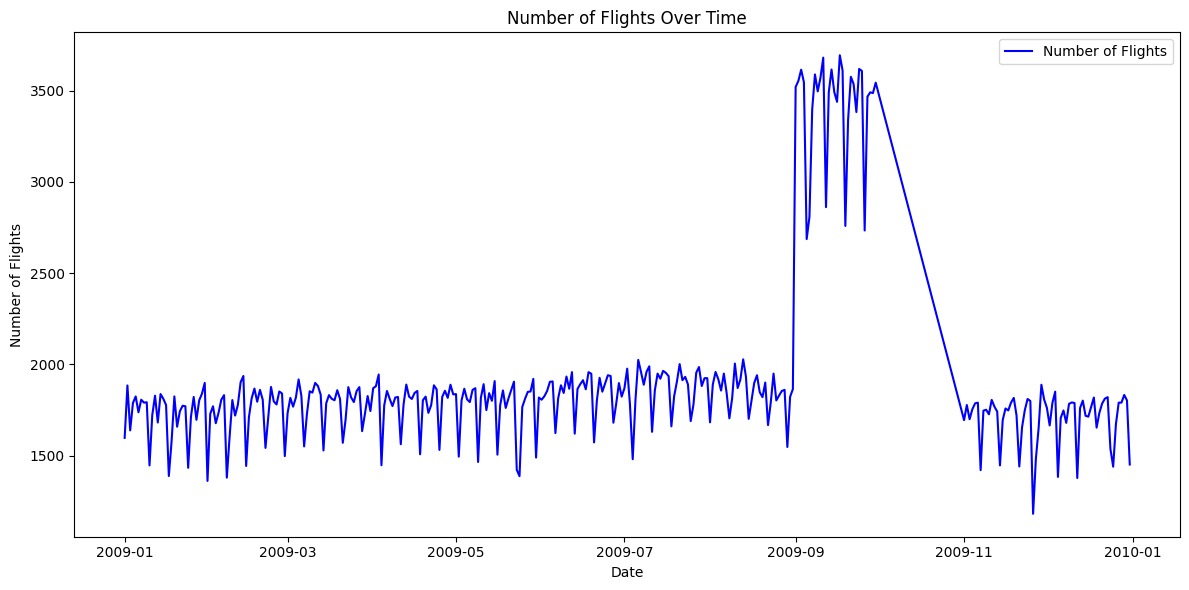

In [289]:
fig1, ax1 = plot_flights_over_time(df)

## Function to visualize average delays over months or years


In [290]:
def plot_average_delays(data, date_column='FL_DATE', delay_column='ARR_DELAY', freq='M'):
    """
    Plots the average delay over time (monthly or yearly).

    :param data: Pandas DataFrame containing flight data.
    :param date_column: Column containing flight dates (default is 'FL_DATE').
    :param delay_column: Column containing delay data (default is 'ARR_DELAY').
    :param freq: Frequency for resampling ('M' for monthly, 'Y' for yearly).
    :return: Matplotlib figure and axis objects.
    """
    # Ensure the date column is in datetime format
    data[date_column] = pd.to_datetime(data[date_column])

    # Group data by the specified frequency
    data['Period'] = data[date_column].dt.to_period(freq)
    average_delays = data.groupby('Period')[delay_column].mean().reset_index()

    # Convert 'Period' back to datetime for plotting
    average_delays['Period'] = average_delays['Period'].dt.to_timestamp()

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(average_delays['Period'], average_delays[delay_column], label=f"Average {delay_column}", color="orange")
    ax.set_title(f"Average {delay_column} Over Time ({'Monthly' if freq == 'M' else 'Yearly'})")
    ax.set_xlabel("Date")
    ax.set_ylabel("Average Delay (Minutes)")
    ax.legend()
    fig.tight_layout()
    return fig, ax


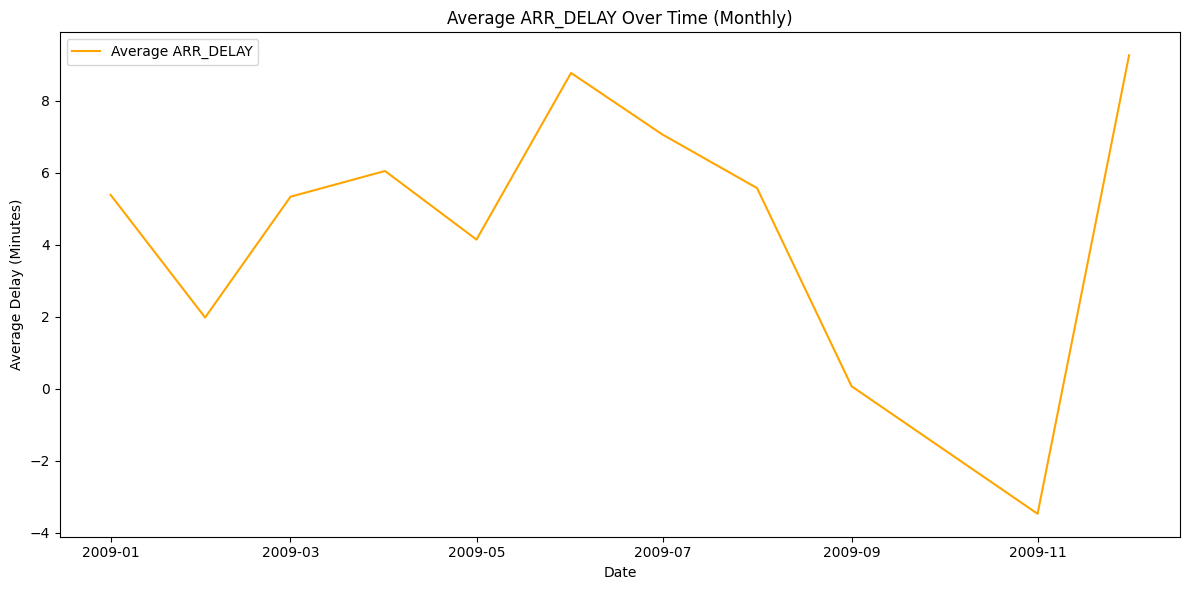

In [291]:
fig2,ax2=plot_average_delays(df)

In [292]:
df.head()

FL_DATE OP_CARRIER  OP_CARRIER_FL_NUM ORIGIN DEST  CRS_DEP_TIME  \
3702461 2009-07-26         XE               2235    ATL  IAH          1200   
2178254 2009-05-04         AS                118    ANC  SEA           630   
3167802 2009-06-28         MQ               4201    ORD  MKE          1405   
2724814 2009-06-04         WN                937    SAT  HRL           835   
2864515 2009-06-11         MQ               3588    MOB  DFW          1720   

         DEP_TIME  DEP_DELAY  TAXI_OUT  WHEELS_OFF  ...  ACTUAL_ELAPSED_TIME  \
3702461    1155.0       -5.0      19.0      1214.0  ...                116.0   
2178254     628.0       -2.0      12.0       640.0  ...                210.0   
3167802    1411.0        6.0      10.0      1421.0  ...                 34.0   
2724814     831.0       -4.0       9.0       840.0  ...                 48.0   
2864515    1714.0       -6.0      10.0      1724.0  ...                116.0   

         AIR_TIME  DISTANCE  CARRIER_DELAY  WEATHER_DELAY  NAS_DELAY  \
3702461      92.0     689.0            0.0            0.0        0.0   
2178254     189.0    1449.0            0.0            0.0        0.0   
3167802      19.0      67.0            0.0            0.0        0.0   
2724814      38.0     233.0            0.0            0.0        0.0   
2864515      88.0     540.0            0.0            0.0        0.0   

        SECURITY_DELAY  LATE_AIRCRAFT_DELAY  Unnamed: 27   Period  
3702461            0.0                  0.0          NaN  2009-07  
2178254            0.0                  0.0          NaN  2009-05  
3167802            0.0                  0.0          NaN  2009-06  
2724814            0.0                  0.0          NaN  2009-06  
2864515            0.0                  0.0          NaN  2009-06  

[5 rows x 29 columns]

In [298]:
def plot_delays_vs_cancellations(data, date_column='FL_DATE', delay_column='DEP_DELAY', cancellation_column='CANCELLED'):
    """
    Plots stacked area chart for delays vs cancellations over time.
    
    :param data: Pandas DataFrame containing flight data.
    :param date_column: Column containing flight dates (default is 'FL_DATE').
    :param delay_column: Column containing delay information (default is 'DELAY').
    :param cancellation_column: Column containing cancellation status (default is 'CANCELLED').
    :return: Matplotlib figure and axis objects.
    """
    import pandas as pd
    import matplotlib.pyplot as plt

    # Ensure the date column is in datetime format
    data[date_column] = pd.to_datetime(data[date_column])

    # Replace negative delays with 0 (or handle as appropriate)
    data[delay_column] = data[delay_column].apply(lambda x: max(x, 0))

    # Filter out canceled flights (assuming 1 indicates cancellation)
    data['is_cancelled'] = data[cancellation_column] == 1

    # Group by date and calculate total delays and cancellations per date
    delays_over_time = data.groupby(date_column)[delay_column].sum()
    cancellations_over_time = data.groupby(date_column)['is_cancelled'].sum()

    # Create a DataFrame to make plotting easier
    plot_data = pd.DataFrame({
        'Delays': delays_over_time,
        'Cancellations': cancellations_over_time
    })

    # Plotting the stacked area chart
    fig, ax = plt.subplots(figsize=(12, 6))
    plot_data.plot.area(ax=ax, stacked=True, color=['blue', 'red'])
    
    # Customizing the chart
    ax.set_title("Stacked Trends of Delays vs Cancellations Over Time")
    ax.set_xlabel("Date")
    ax.set_ylabel("Total Counts")
    ax.legend(["Delays", "Cancellations"], loc="upper left")
    fig.tight_layout()
    return fig, ax


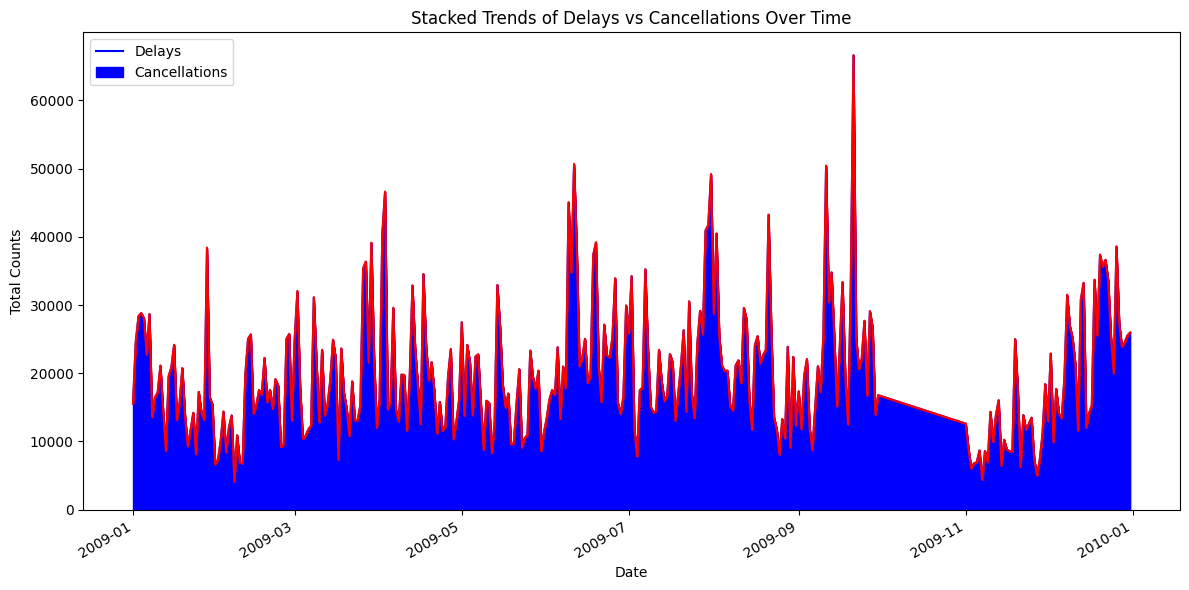

In [299]:
fig3,ax3=plot_delays_vs_cancellations(df)

In [300]:
df.columns

Index(['FL_DATE', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'Unnamed: 27', 'Period', 'is_cancelled'],
      dtype='object')

In [304]:
def heatmap_delay_by_hour_and_day(df):
    # Convert CRS_DEP_TIME to hour of the day (considering it's in military time)
    df['hour_of_day'] = df['CRS_DEP_TIME'].apply(lambda x: x // 100)
    
    # If DAY_OF_WEEK is not present, we can extract it from FL_DATE (0=Monday, 6=Sunday)
    if 'DAY_OF_WEEK' not in df.columns:
        df['DAY_OF_WEEK'] = pd.to_datetime(df['FL_DATE']).dt.dayofweek
    
    # Pivot table for delay patterns by hour of the day and day of the week
    delay_by_hour_day = df.pivot_table(
        values='ARR_DELAY', 
        index='DAY_OF_WEEK', 
        columns='hour_of_day', 
        aggfunc='mean', 
        fill_value=0
    )
    
    # Create heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(delay_by_hour_day, cmap='coolwarm', annot=True, fmt='.1f', linewidths=0.5)
    plt.title("Average Flight Delay by Hour of Day and Day of Week")
    plt.xlabel('Hour of the Day')
    plt.ylabel('Day of the Week')
    plt.show()




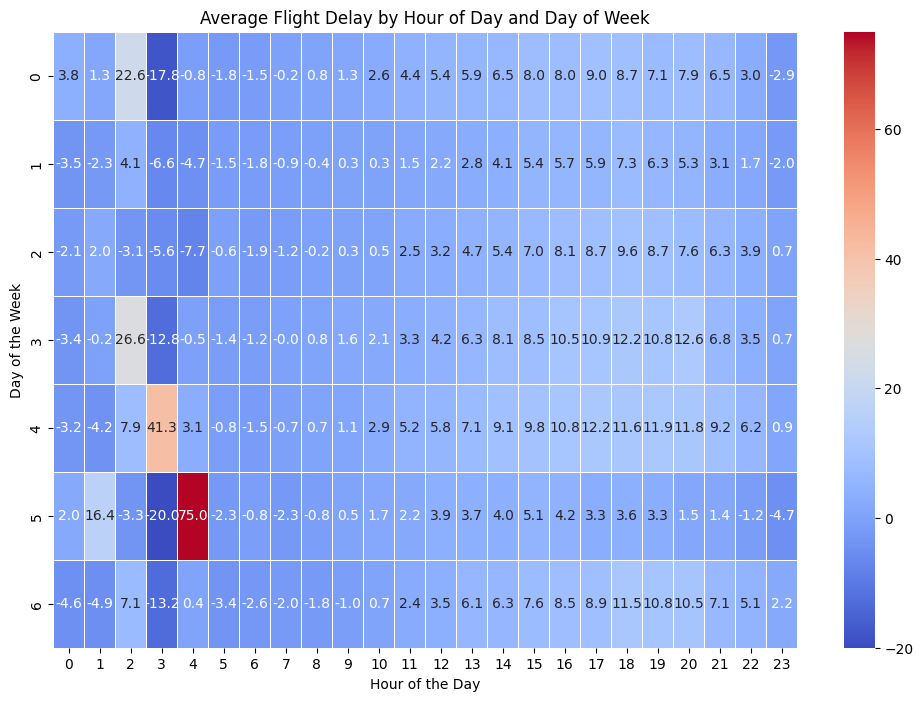

In [305]:
heatmap_delay_by_hour_and_day(df)

In [303]:
df.head()

FL_DATE OP_CARRIER  OP_CARRIER_FL_NUM ORIGIN DEST  CRS_DEP_TIME  \
3702461 2009-07-26         XE               2235    ATL  IAH          1200   
2178254 2009-05-04         AS                118    ANC  SEA           630   
3167802 2009-06-28         MQ               4201    ORD  MKE          1405   
2724814 2009-06-04         WN                937    SAT  HRL           835   
2864515 2009-06-11         MQ               3588    MOB  DFW          1720   

         DEP_TIME  DEP_DELAY  TAXI_OUT  WHEELS_OFF  ...  DISTANCE  \
3702461    1155.0        0.0      19.0      1214.0  ...     689.0   
2178254     628.0        0.0      12.0       640.0  ...    1449.0   
3167802    1411.0        6.0      10.0      1421.0  ...      67.0   
2724814     831.0        0.0       9.0       840.0  ...     233.0   
2864515    1714.0        0.0      10.0      1724.0  ...     540.0   

         CARRIER_DELAY  WEATHER_DELAY  NAS_DELAY  SECURITY_DELAY  \
3702461            0.0            0.0        0.0             0.0   
2178254            0.0            0.0        0.0             0.0   
3167802            0.0            0.0        0.0             0.0   
2724814            0.0            0.0        0.0             0.0   
2864515            0.0            0.0        0.0             0.0   

         LATE_AIRCRAFT_DELAY Unnamed: 27   Period  is_cancelled  hour_of_day  
3702461                  0.0         NaN  2009-07         False           12  
2178254                  0.0         NaN  2009-05         False            6  
3167802                  0.0         NaN  2009-06         False           14  
2724814                  0.0         NaN  2009-06         False            8  
2864515                  0.0         NaN  2009-06         False           17  

[5 rows x 31 columns]

In [306]:
def heatmap_seasonal_trends(df):
    # Extract month from FL_DATE
    df['Month'] = pd.to_datetime(df['FL_DATE']).dt.month
    
    # Calculate average delay by month
    delay_by_month = df.groupby('Month')['ARR_DELAY'].mean()
    
    # Create heatmap for seasonal trends
    plt.figure(figsize=(10, 6))
    sns.heatmap(delay_by_month.values.reshape(1, -1), cmap='coolwarm', annot=True, fmt='.1f', cbar=True, xticklabels=delay_by_month.index)
    plt.title("Seasonal Flight Delays (Month vs. Average Delay)")
    plt.xlabel('Month')
    plt.ylabel('Average Delay')
    plt.yticks([])
    plt.show()

# Example usage
# Assuming you have already loaded your dataset as `df`
# heatmap_delay_by_hour_and_day(df)
# heatmap_seasonal_trends(df)

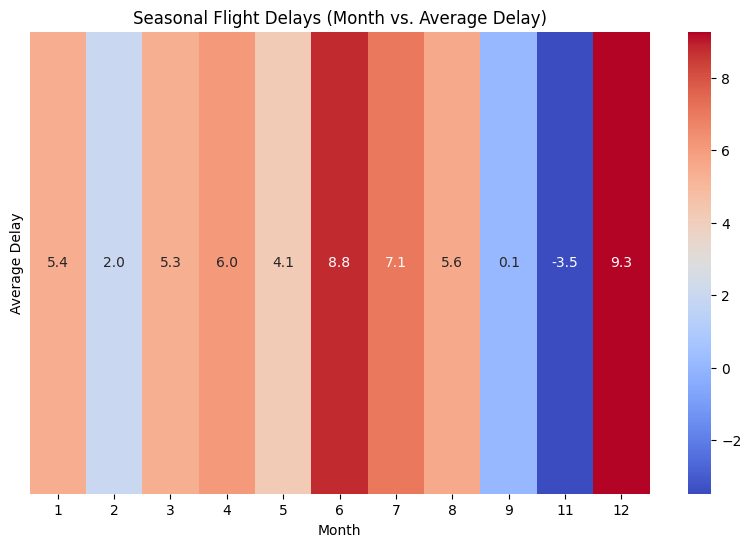

In [308]:
heatmap_seasonal_trends(df)

In [317]:
def get_airport_coordinates(airport_code):
    # Example for a simplified dataset
    airport_coords = {
        'DCA': [38.8521, -77.0377],
        'EWR': [40.6895, -74.1745],
        'IAD': [38.9531, -77.4461],
        'ATL': [33.6407, -84.4279],
        'CLE': [41.4124, -81.8497],
        # Add more airports here as needed
    }
    return airport_coords.get(airport_code, [None, None])

# 1. Flight Path Map: Connections between ORIGIN and DEST airports, highlighting delays
def flight_path_map(df):
    # Create a folium map centered around the US
    map_folium = folium.Map(location=[37.0902, -95.7129], zoom_start=4)
    
    for _, row in df.iterrows():
        origin_coords = get_airport_coordinates(row['ORIGIN'])
        dest_coords = get_airport_coordinates(row['DEST'])
        
        if None not in origin_coords and None not in dest_coords:
            # Draw a line between origin and destination
            folium.PolyLine([origin_coords, dest_coords], color='blue', weight=2.5, opacity=0.7).add_to(map_folium)
            
            # Highlight delay on the path (e.g., longer delay = red color)
            if row['ARR_DELAY'] > 0:
                folium.PolyLine([origin_coords, dest_coords], color='red', weight=2.5, opacity=0.7).add_to(map_folium)
    
    # Show the map
    return map_folium

# 2. Choropleth Map: Total flights or delays by state
def choropleth_map(df, geojson, key, value_col, title="Choropleth Map"):
    # Aggregate the data by state
    state_data = df.groupby('ORIGIN')[value_col].sum().reset_index()

    # Merge the flight data with the geojson data
    geo_data = gpd.read_file(geojson)  # Load geojson for US states
    geo_data = geo_data.merge(state_data, left_on='STUSPS', right_on='ORIGIN', how='left')

    # Plot the choropleth map
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    geo_data.plot(column=value_col, ax=ax, legend=True, legend_kwds={'label': f"{title}"})
    plt.title(f"{title} - {key}")
    plt.show()

# 3. Bubble Map: Size airports by traffic or delays
def bubble_map(df, value_col="ARR_DELAY"):
    # Create a Plotly bubble map based on traffic or delays
    df['coordinates'] = df.apply(lambda row: get_airport_coordinates(row['ORIGIN']), axis=1)
    df.dropna(subset=['coordinates'], inplace=True)
    
    # Get latitude and longitude for the map
    df['lat'] = df['coordinates'].apply(lambda x: x[0])
    df['lon'] = df['coordinates'].apply(lambda x: x[1])
    
    fig = px.scatter_geo(df, lat='lat', lon='lon', size=value_col,
                         hover_name="ORIGIN", size_max=50,
                         title="Bubble Map - Airport Traffic/Delays")
    fig.update_geos(scope='usa')
    fig.show()

# 4. Density Map: Visualize high-traffic regions or delay hotspots
def density_map(df):
    # Generate a HeatMap of traffic or delay density
    df['coordinates'] = df.apply(lambda row: get_airport_coordinates(row['ORIGIN']), axis=1)
    df.dropna(subset=['coordinates'], inplace=True)
    
    # Create a base folium map
    map_folium = folium.Map(location=[37.0902, -95.7129], zoom_start=4)
    
    # Generate HeatMap data (use ARR_DELAY or any other column for weighting)
    heat_data = [[coords[0], coords[1], row['ARR_DELAY']] for coords, row in zip(df['coordinates'], df.itertuples())]
    
    # Add HeatMap to the map
    HeatMap(heat_data).add_to(map_folium)
    
    return map_folium


In [318]:
flight_map = flight_path_map(df)


In [319]:
flight_map

In [320]:
geojson = "us_states_geojson.json"
choropleth_map_display = choropleth_map(df, geojson, key='STUSPS', value_col='ARR_DELAY', title="Delays by State")
plt.show()

DataSourceError: us_states_geojson.json: No such file or directory

In [321]:
bubble_map_display = bubble_map(df)
bubble_map_display.show()

ValueError: 
    Invalid element(s) received for the 'size' property of scattergeo.marker
        Invalid elements include: [-11.0, -5.0, -6.0, -5.0, -15.0, nan, -2.0, nan, -3.0, -8.0]

    The 'size' property is a number and may be specified as:
      - An int or float in the interval [0, inf]
      - A tuple, list, or one-dimensional numpy array of the above

In [322]:
density_map_display = density_map(df)
density_map_display.show()  # This will display the density map

TypeError: tuple indices must be integers or slices, not str